## Pollution Map

In [38]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
from shapely import wkt
import geopy
import geoplot as geoplot
import utm
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
%matplotlib inline

In [3]:
file = 'boundaries/bdry_school_attendance_areas.gdb'
shp_df = gpd.read_file(file)

In [5]:
grad_df = pd.read_csv("Resources/point_grad_rates.csv")

In [6]:
grad_df['geometry'] = grad_df['geometry'].apply(wkt.loads)

In [7]:
grad_gdf = gpd.GeoDataFrame(grad_df, geometry='geometry')

In [8]:
grad_gdf.crs = {'init': 'epsg:26915'}

In [9]:
fileschool = "boundaries/school_programs/school_program_locations.shp"
schpg_df = gpd.read_file(fileschool)
schpg_df.crs = {'init': 'epsg:26915'}

https://gisdata.mn.gov/dataset/struc-school-program-locs

In [10]:
file = 'boundaries/my_neighborhood/my_neighborhood_sites.shp'
nbh_df = gpd.read_file(file)

https://gisdata.mn.gov/dataset/env-my-neighborhood

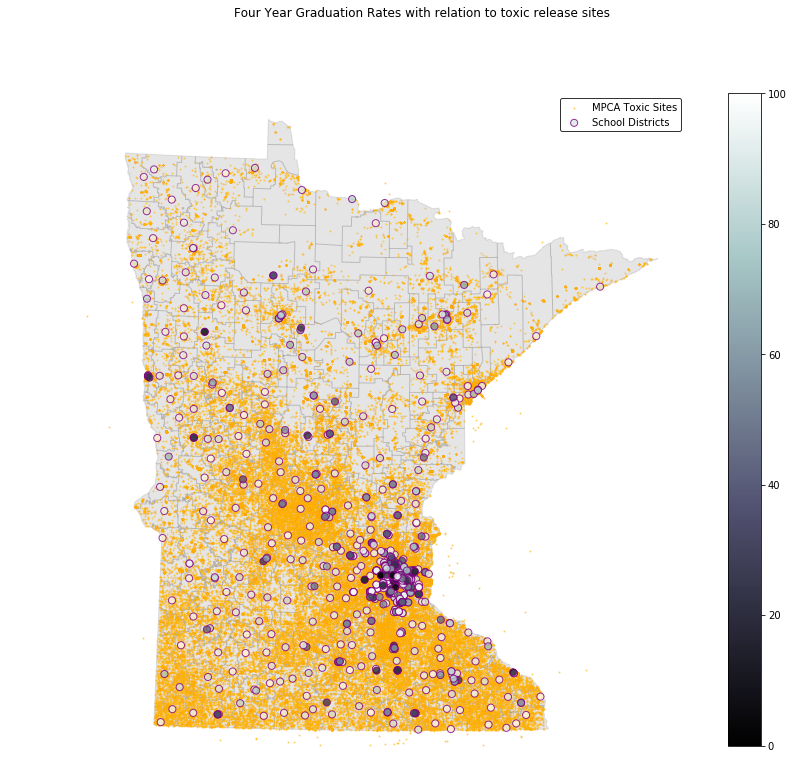

In [70]:
fig, ax = plt.subplots(1, figsize=(15,12))
base = shp_df.plot(ax=ax, alpha=0.1, color='black', edgecolor='k')
nbh_df.plot(ax=ax, marker="o", color="yellow", edgecolor='orange', markersize=1, alpha=0.5, label="MPCA Toxic Sites")
#schpg_df.plot(ax=base, marker="o", color="red",markersize=5, label="School Lunch Programs")
grad_gdf.plot(column='Four Year Percent', cmap='bone', alpha=0.8, legend=True, ax=ax, marker="o", edgecolor="purple", markersize=50, label="School Districts")
ax.set_ylim(4800000, 5500000)
legend = plt.legend(frameon = True, edgecolor= 'black')
fig.suptitle('Four Year Graduation Rates with relation to toxic release sites')
_ = ax.axis('off')

plt.savefig('toxic_lunch.png', bbox_inches='tight')